<a href="https://colab.research.google.com/github/vanecornejo/Simulaci-n-I/blob/main/M%C3%A9todo%20de%20Aceptaci%C3%B3n%20y%20Rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Aceptación y Rechazo

El método de aceptación y rechazo es una técnica general para generar variables aleatorias cuando la función de densidad no permite una transformación directa.
Consiste en proponer muestras de una distribución más simple y luego aceptarlas o rechazarlas según una condición basada en la relación entre la densidad de la distribución deseada y la densidad de la distribución propuesta.



*   **PASO 1:** Generar dos números aleatorios $R_1$ y $R_2$
*   **PASO 2:** Determinar $x$
$$ x = a + (c-a) R_1 $$
*   **PASO 3:** Evaluar $f$ en $x$
*   **PASO 4:** Si $R_2 ≤ \frac{f(x)}{M}$, aceptar $x$. Otro caso, rechazar $x$


La distribución triangular con parámetros $a$ (mínimo), $b$ (máximo) y $c$ (modo), tiene una forma triangular (como su nombre indica) y su función de densidad es:
$$
f(x) =
\begin{cases}
\frac{2(x - a)}{(c - a)(b - a)} & \text{si } a \leq x \leq b \\
\frac{-2(x - c)}{(c - a)(c - b)} & \text{si } b < x \leq c
\end{cases}
$$




In [173]:
# Importamos las librerías necesarias
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [174]:
# Parámetros de la distribución triangular
a = 1 # mínimo
b = 3  # modo
c = 5 # máximo

# Función de densidad f(x) de la distribución triangular
def triangular(x):
    if a <= x <= b:
        return 2*(x-a) / ((c-a)*(b-a))
    elif b < x <= c:
        return ((-2)*(x-c)) / ((c-a)*(c-b))
    else:
        return 0

In [175]:
# Valor máximo de la función de densidad (en x=b)
M = 2/(c-a)

# Método de aceptación y rechazo
def aceptacion(n):
  lista = [] # lista para almacenar los datos aceptados
  for i in range(n):
    R1 = rd.random()
    R2 = rd.random()
    x = a + (c-a)*R1  # generar x en [a, c]

# Utilizamos la condición if para aceptar o rechazar los valores
    if R2 <= triangular(x)/M: #criterio de aceptación
      lista.append(x) #guardamos los valores aceptados en la lista creada anteriormente
  return lista

In [176]:
# Mandamos llamar la función de aceptación y rechazo, con 100000 intentos
datos = aceptacion(100000)
print(datos) # imprimimos la lista con los valores aceptados

[4.363396324528739, 4.490986475254335, 3.63037050913025, 4.0606149325679475, 3.2820218661365868, 2.4057223493808415, 4.4069186415910595, 1.5998202491088902, 2.15155418008428, 2.327738449211105, 4.192740633344812, 3.998027762396642, 2.1725309061082347, 2.9805450234014415, 2.555408278907535, 2.289725665547136, 1.7482164296493141, 2.810297053355822, 1.6387379870329286, 3.51781688628735, 4.412925830364747, 3.6658211211609983, 4.605194087911686, 3.699904533732082, 1.5434503312692658, 1.5017411734341368, 1.9221780849507177, 2.652232655291851, 3.658727138354497, 4.0238652456199615, 2.1669492202413116, 4.039760081987774, 3.2930349557519984, 3.816653830593275, 2.888966361992191, 2.6814152942599025, 1.773329029343552, 1.9582621693632363, 1.5801926908737625, 4.151626384231895, 3.7343643796893513, 2.7859093118655958, 2.7139927995630706, 3.7712260654485976, 3.1618005388004504, 2.530820068768806, 2.952159355063267, 1.7916491138385449, 2.4757721320973114, 3.2349504175725032, 1.8738212553553253, 2.788

(array([  14.,   33.,   48.,   72.,   94.,  110.,  147.,  161.,  152.,
         186.,  207.,  212.,  282.,  285.,  296.,  324.,  295.,  358.,
         386.,  384.,  403.,  422.,  469.,  453.,  460.,  513.,  551.,
         539.,  584.,  592.,  650.,  613.,  623.,  620.,  661.,  702.,
         740.,  727.,  775.,  864.,  800.,  822.,  848.,  846.,  891.,
         896.,  909.,  934.,  971., 1002.,  973.,  963.,  990.,  927.,
         909.,  923.,  851.,  814.,  821.,  817.,  761.,  785.,  732.,
         724.,  706.,  661.,  663.,  632.,  668.,  625.,  601.,  524.,
         578.,  536.,  496.,  492.,  452.,  459.,  434.,  440.,  360.,
         349.,  346.,  314.,  312.,  289.,  277.,  280.,  239.,  200.,
         217.,  163.,  145.,  152.,  106.,   82.,   77.,   44.,   35.,
          26.]),
 array([1.00682113, 1.04665585, 1.08649056, 1.12632528, 1.16615999,
        1.20599471, 1.24582943, 1.28566414, 1.32549886, 1.36533357,
        1.40516829, 1.44500301, 1.48483772, 1.52467244, 1.56450716

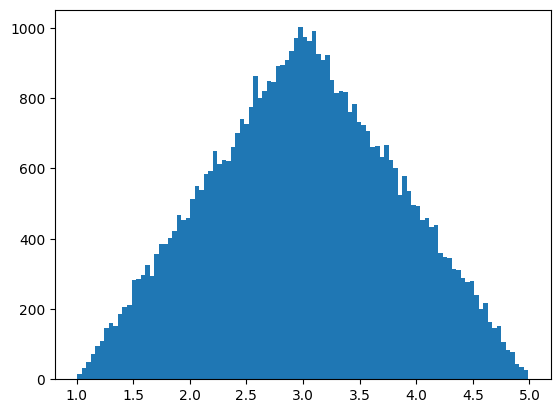

In [177]:
# Imprimimos el histograma con los valores aceptados
plt.hist(datos, bins=100)

In [178]:
# Calculamos e imprimimos la media y la varianza de la muestra
print("La media es:", np.mean(datos))
print("La varianza es:", np.var(datos))

# Resultados teóricos
media = (a+b+c)/3
var = np.sqrt((a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18)
print("\nComparando con los resultados teóricos:")
print("La media teórica:", media)
print("La varianza teórica:", var)

La media es: 2.9992881511147655
La varianza es: 0.6667222059705712

Comparando con los resultados teóricos:
La media teórica: 3.0
La varianza teórica: 0.816496580927726


In [179]:
# Cuántos valores fueron aceptados
len(datos)

49896